# **NCF**

Load dataset and fit model

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ndcg_score
import time

# Load the MovieLens dataset
ratings_data = pd.read_csv('ratings.csv')
movies_data = pd.read_csv('movies.csv')

# Keep the original user and movie IDs
user_ids = ratings_data['userId'].unique()
movie_ids = ratings_data['movieId'].unique()

# Merge movie names to the ratings dataset
ratings_data = pd.merge(ratings_data, movies_data[['movieId', 'title']], on='movieId', how='left')

print(ratings_data)

num_users = len(user_ids)
num_movies = len(movie_ids)

user_embedding_dim = 32
movie_embedding_dim = 32

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_data, test_size=0.2, random_state=42)

# Create the neural network model
user_input = Input(shape=(1,))
user_embedding = Embedding(num_users, user_embedding_dim)(user_input)
user_flatten = Flatten()(user_embedding)

movie_input = Input(shape=(1,))
movie_embedding = Embedding(num_movies, movie_embedding_dim)(movie_input)
movie_flatten = Flatten()(movie_embedding)

concatenated = Concatenate()([user_flatten, movie_flatten])
dense_1 = Dense(128, activation='relu')(concatenated)
dense_2 = Dense(64, activation='relu')(dense_1)
output = Dense(1)(dense_2)

model = Model(inputs=[user_input, movie_input], outputs=output)

# Compile and train the model using the original IDs from the dataset
model.compile(optimizer='adam', loss='mean_squared_error')

# Use ModelCheckpoint to save the best model weights based on validation loss
checkpoint = ModelCheckpoint('best_model_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Start the timer
start_time = time.time()

model.fit([train_data['userId'], train_data['movieId']], train_data['rating'],
          epochs=10, batch_size=64,
          validation_data=([test_data['userId'], test_data['movieId']], test_data['rating']),
          callbacks=[checkpoint])

# Stop the timer and calculate the training time
training_time = time.time() - start_time

# Load the best model weights
model.load_weights('best_model_weights.h5')

# Print the training time
print('Training time:', training_time, 'seconds')

        userId  movieId  rating   timestamp                           title
0            1        1     4.0   964982703                Toy Story (1995)
1            1        3     4.0   964981247         Grumpier Old Men (1995)
2            1        6     4.0   964982224                     Heat (1995)
3            1       47     5.0   964983815     Seven (a.k.a. Se7en) (1995)
4            1       50     5.0   964982931      Usual Suspects, The (1995)
...        ...      ...     ...         ...                             ...
100831     610   166534     4.0  1493848402                    Split (2017)
100832     610   168248     5.0  1493850091   John Wick: Chapter Two (2017)
100833     610   168250     5.0  1494273047                  Get Out (2017)
100834     610   168252     5.0  1493846352                    Logan (2017)
100835     610   170875     3.0  1493846415  The Fate of the Furious (2017)

[100836 rows x 5 columns]
Epoch 1/10
1261/1261 [==============================] - ETA: 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ndcg_score
import time

# Load the MovieLens dataset
ratings_data = pd.read_csv('ratings.csv')
movies_data = pd.read_csv('movies.csv')

# Keep the original user and movie IDs
user_ids = ratings_data['userId'].unique()
movie_ids = ratings_data['movieId'].unique()

# Merge movie names to the ratings dataset
ratings_data = pd.merge(ratings_data, movies_data[['movieId', 'title']], on='movieId', how='left')

print(ratings_data)

num_users = len(user_ids)
num_movies = len(movie_ids)

user_embedding_dim = 32
movie_embedding_dim = 32

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_data, test_size=0.2, random_state=42)

# Create the neural network model
user_input = Input(shape=(1,))
user_embedding = Embedding(num_users, user_embedding_dim)(user_input)
user_flatten = Flatten()(user_embedding)

movie_input = Input(shape=(1,))
movie_embedding = Embedding(num_movies, movie_embedding_dim)(movie_input)
movie_flatten = Flatten()(movie_embedding)

concatenated = Concatenate()([user_flatten, movie_flatten])
dense_1 = Dense(128, activation='relu')(concatenated)
dense_2 = Dense(64, activation='relu')(dense_1)
output = Dense(1)(dense_2)

model = Model(inputs=[user_input, movie_input], outputs=output)

# Compile and train the model using the original IDs from the dataset
model.compile(optimizer='nadam', loss='mean_squared_error')

# Use ModelCheckpoint to save the best model weights based on validation loss
checkpoint = ModelCheckpoint('best_model_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Start the timer
start_time = time.time()

model.fit([train_data['userId'], train_data['movieId']], train_data['rating'],
          epochs=10, batch_size=64,
          validation_data=([test_data['userId'], test_data['movieId']], test_data['rating']),
          callbacks=[checkpoint])

# Stop the timer and calculate the training time
training_time = time.time() - start_time

# Load the best model weights
model.load_weights('best_model_weights.h5')

# Print the training time
print('Training time:', training_time, 'seconds')

        userId  movieId  rating   timestamp                           title
0            1        1     4.0   964982703                Toy Story (1995)
1            1        3     4.0   964981247         Grumpier Old Men (1995)
2            1        6     4.0   964982224                     Heat (1995)
3            1       47     5.0   964983815     Seven (a.k.a. Se7en) (1995)
4            1       50     5.0   964982931      Usual Suspects, The (1995)
...        ...      ...     ...         ...                             ...
100831     610   166534     4.0  1493848402                    Split (2017)
100832     610   168248     5.0  1493850091   John Wick: Chapter Two (2017)
100833     610   168250     5.0  1494273047                  Get Out (2017)
100834     610   168252     5.0  1493846352                    Logan (2017)
100835     610   170875     3.0  1493846415  The Fate of the Furious (2017)

[100836 rows x 5 columns]
Epoch 1/10
1261/1261 [==============================] - ETA: 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ndcg_score
import time

# Load the MovieLens dataset
ratings_data = pd.read_csv('ratings.csv')
movies_data = pd.read_csv('movies.csv')

# Keep the original user and movie IDs
user_ids = ratings_data['userId'].unique()
movie_ids = ratings_data['movieId'].unique()

# Merge movie names to the ratings dataset
ratings_data = pd.merge(ratings_data, movies_data[['movieId', 'title']], on='movieId', how='left')

print(ratings_data)

num_users = len(user_ids)
num_movies = len(movie_ids)

user_embedding_dim = 32
movie_embedding_dim = 32

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_data, test_size=0.2, random_state=42)

# Create the neural network model
user_input = Input(shape=(1,))
user_embedding = Embedding(num_users, user_embedding_dim)(user_input)
user_flatten = Flatten()(user_embedding)

movie_input = Input(shape=(1,))
movie_embedding = Embedding(num_movies, movie_embedding_dim)(movie_input)
movie_flatten = Flatten()(movie_embedding)

concatenated = Concatenate()([user_flatten, movie_flatten])
dense_1 = Dense(128, activation='relu')(concatenated)
dense_2 = Dense(64, activation='relu')(dense_1)
output = Dense(1)(dense_2)

model = Model(inputs=[user_input, movie_input], outputs=output)

# Compile and train the model using the original IDs from the dataset
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Use ModelCheckpoint to save the best model weights based on validation loss
checkpoint = ModelCheckpoint('best_model_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Start the timer
start_time = time.time()

model.fit([train_data['userId'], train_data['movieId']], train_data['rating'],
          epochs=10, batch_size=64,
          validation_data=([test_data['userId'], test_data['movieId']], test_data['rating']),
          callbacks=[checkpoint])

# Stop the timer and calculate the training time
training_time = time.time() - start_time

# Load the best model weights
model.load_weights('best_model_weights.h5')

# Print the training time
print('Training time:', training_time, 'seconds')

        userId  movieId  rating   timestamp                           title
0            1        1     4.0   964982703                Toy Story (1995)
1            1        3     4.0   964981247         Grumpier Old Men (1995)
2            1        6     4.0   964982224                     Heat (1995)
3            1       47     5.0   964983815     Seven (a.k.a. Se7en) (1995)
4            1       50     5.0   964982931      Usual Suspects, The (1995)
...        ...      ...     ...         ...                             ...
100831     610   166534     4.0  1493848402                    Split (2017)
100832     610   168248     5.0  1493850091   John Wick: Chapter Two (2017)
100833     610   168250     5.0  1494273047                  Get Out (2017)
100834     610   168252     5.0  1493846352                    Logan (2017)
100835     610   170875     3.0  1493846415  The Fate of the Furious (2017)

[100836 rows x 5 columns]
Epoch 1/10
1261/1261 [==============================] - ETA: 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ndcg_score
import time

# Load the MovieLens dataset
ratings_data = pd.read_csv('ratings.csv')
movies_data = pd.read_csv('movies.csv')

# Keep the original user and movie IDs
user_ids = ratings_data['userId'].unique()
movie_ids = ratings_data['movieId'].unique()

# Merge movie names to the ratings dataset
ratings_data = pd.merge(ratings_data, movies_data[['movieId', 'title']], on='movieId', how='left')

print(ratings_data)

num_users = len(user_ids)
num_movies = len(movie_ids)

user_embedding_dim = 32
movie_embedding_dim = 32

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_data, test_size=0.2, random_state=42)

# Create the neural network model
user_input = Input(shape=(1,))
user_embedding = Embedding(num_users, user_embedding_dim)(user_input)
user_flatten = Flatten()(user_embedding)

movie_input = Input(shape=(1,))
movie_embedding = Embedding(num_movies, movie_embedding_dim)(movie_input)
movie_flatten = Flatten()(movie_embedding)

concatenated = Concatenate()([user_flatten, movie_flatten])
dense_1 = Dense(128, activation='relu')(concatenated)
dense_2 = Dense(64, activation='relu')(dense_1)
output = Dense(1)(dense_2)

model = Model(inputs=[user_input, movie_input], outputs=output)

# Compile and train the model using the original IDs from the dataset
model.compile(optimizer='sgd', loss='mean_squared_error')

# Use ModelCheckpoint to save the best model weights based on validation loss
checkpoint = ModelCheckpoint('best_model_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Start the timer
start_time = time.time()

model.fit([train_data['userId'], train_data['movieId']], train_data['rating'],
          epochs=10, batch_size=64,
          validation_data=([test_data['userId'], test_data['movieId']], test_data['rating']),
          callbacks=[checkpoint])

# Stop the timer and calculate the training time
training_time = time.time() - start_time

# Load the best model weights
model.load_weights('best_model_weights.h5')

# Print the training time
print('Training time:', training_time, 'seconds')

        userId  movieId  rating   timestamp                           title
0            1        1     4.0   964982703                Toy Story (1995)
1            1        3     4.0   964981247         Grumpier Old Men (1995)
2            1        6     4.0   964982224                     Heat (1995)
3            1       47     5.0   964983815     Seven (a.k.a. Se7en) (1995)
4            1       50     5.0   964982931      Usual Suspects, The (1995)
...        ...      ...     ...         ...                             ...
100831     610   166534     4.0  1493848402                    Split (2017)
100832     610   168248     5.0  1493850091   John Wick: Chapter Two (2017)
100833     610   168250     5.0  1494273047                  Get Out (2017)
100834     610   168252     5.0  1493846352                    Logan (2017)
100835     610   170875     3.0  1493846415  The Fate of the Furious (2017)

[100836 rows x 5 columns]
Epoch 1/10
1261/1261 [==============================] - ETA: 

Evaluate Model

In [ ]:
# Evaluate the model on the test set
evaluation = model.evaluate([test_data['userId'], test_data['movieId']], test_data['rating'])

# Print the evaluation results
print(f"Mean Squared Error on Test Set: {evaluation}")

# Set a ceiling and a floor for predictions
ceiling = 5.0  # Maximum rating
floor = 0.5   # Minimum rating

# Evaluate the model on the testing set using RMSE
predictions = model.predict([test_data['userId'], test_data['movieId']])

# Apply ceiling and floor to predictions
predictions = np.clip(predictions, floor, ceiling)

rmse = np.sqrt(mean_squared_error(test_data['rating'], predictions))
print(f'Root Mean Squared Error on Test Data: {rmse}')

# Reshape predictions to a 1D array
predictions = predictions.flatten()

# Calculate NDCG
ndcg = ndcg_score(np.array([test_data['rating']]), np.array([predictions]))
print(f'NDCG on Test Data: {ndcg}')

# Get indices of top 100 predictions
top_100_indices = np.argsort(predictions)[::-1][:100]

# Select top 100 recommendations based on indices
top_100_predictions = predictions[top_100_indices]
top_100_actual_ratings = test_data['rating'].iloc[top_100_indices]

# Calculate NDCG at 100
ndcg_100 = ndcg_score(np.array([top_100_actual_ratings]), np.array([top_100_predictions]))
print(f'NDCG at 100 on Test Data: {ndcg_100}')

631/631 [==============================] - 2s 3ms/step - loss: 0.7728
Mean Squared Error on Test Set: 0.7727896571159363
631/631 [==============================] - 1s 2ms/step
Root Mean Squared Error on Test Data: 0.879083938552633
NDCG on Test Data: 0.9874247375368116
NDCG at 100 on Test Data: 0.9893969214620129


In [ ]:
# Print the shapes of arrays
print(f"Actual Ratings shape: {np.array([test_data['rating']]).shape}")
print(f"Predicted Ratings shape: {np.array([predictions]).shape}")

print(np.array([test_data['rating']]))
print(np.array([predictions]))

Actual Ratings shape: (1, 20168)
Predicted Ratings shape: (1, 20168)
[[4.5 3.  3.  ... 4.5 3.  3. ]]
[[3.6214035 3.2130082 2.623372  ... 4.008339  3.4545395 3.0333138]]


Recommend unrated movies for a user

In [ ]:
def recommend_movies(user_id, num_recommendations=10):
    # Get all movie IDs that the user has not rated
    unrated_movies = movies_data[~movies_data['movieId'].isin(ratings_data[ratings_data['userId'] == user_id]['movieId'])]

    # Create input data for the user and unrated movies
    user_input_recommendation = np.full((len(unrated_movies), 1), user_id)
    movie_input_recommendation = unrated_movies['movieId'].values.reshape(-1, 1)

    # Make predictions for the unrated movies
    recommendations = model.predict([user_input_recommendation, movie_input_recommendation])

    # Apply ceiling and floor to predictions
    ceiling = 5.0  # Maximum rating
    floor = 0.5   # Minimum rating
    recommendations = np.clip(recommendations, floor, ceiling)

    # Add the predicted ratings to the unrated movies DataFrame
    unrated_movies['predicted_rating'] = recommendations

    # Sort movies based on predicted ratings in descending order
    recommended_movies = unrated_movies.sort_values(by='predicted_rating', ascending=False)

    # Display the top recommended movies
    top_recommendations = recommended_movies.head(num_recommendations)[['movieId', 'title', 'predicted_rating']]
    return top_recommendations

# Example: Recommend 10 movies for user ID 1
user_id_for_recommendation = 1
num_recommendations = 10
recommended_movies = recommend_movies(user_id_for_recommendation, num_recommendations)
print(recommended_movies)


298/298 [==============================] - 1s 2ms/step
      movieId                                            title  \
2582     3451              Guess Who's Coming to Dinner (1967)   
1762     2360                 Celebration, The (Festen) (1998)   
2593     3468                              Hustler, The (1961)   
687       905                     It Happened One Night (1934)   
841      1104                 Streetcar Named Desire, A (1951)   
937      1237  Seventh Seal, The (Sjunde inseglet, Det) (1957)   
918      1217                                       Ran (1985)   
4046     5747                                 Gallipoli (1981)   
731       951                           His Girl Friday (1940)   
924      1223  Grand Day Out with Wallace and Gromit, A (1989)   

      predicted_rating  
2582          4.859882  
1762          4.790791  
2593          4.773615  
687           4.742429  
841           4.734063  
937           4.695260  
918           4.680199  
4046          4.66

<ipython-input-42-7eb7f458fe0b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unrated_movies['predicted_rating'] = recommendations


Recommend rated movies and plot them with the actual and predicted ratings

8/8 [==============================] - 0s 2ms/step


<ipython-input-43-5c677c3ab6b2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_movies['predicted_rating'] = recommendations


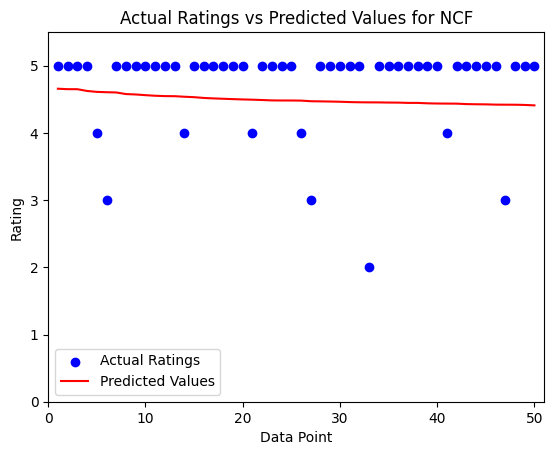

     movieId                                              title  rating  \
147     2329                          American History X (1998)     5.0   
192     2959                                  Fight Club (1999)     5.0   
28       527                            Schindler's List (1993)     5.0   
74      1213                                  Goodfellas (1990)     5.0   
20       356                                Forrest Gump (1994)     4.0   
16       296                                Pulp Fiction (1994)     3.0   
68      1196  Star Wars: Episode V - The Empire Strikes Back...     5.0   
62      1089                              Reservoir Dogs (1992)     5.0   
73      1210  Star Wars: Episode VI - Return of the Jedi (1983)     5.0   
15       260          Star Wars: Episode IV - A New Hope (1977)     5.0   
61      1080                Monty Python's Life of Brian (1979)     5.0   
36       608                                       Fargo (1996)     5.0   
219     3578             

In [ ]:
import matplotlib.pyplot as plt

def recommend_movies_with_ratings_and_plot(user_id, num_recommendations=10):
    # Get all movie IDs that the user has rated
    rated_movies = ratings_data[ratings_data['userId'] == user_id]

    # Create input data for the user and rated movies
    user_input_recommendation = np.full((len(rated_movies), 1), user_id)
    movie_input_recommendation = rated_movies['movieId'].values.reshape(-1, 1)

    # Make predictions for the rated movies
    recommendations = model.predict([user_input_recommendation, movie_input_recommendation])

    # Apply ceiling and floor to predictions
    ceiling = 5.0  # Maximum rating
    floor = 0.5   # Minimum rating
    recommendations = np.clip(recommendations, floor, ceiling)

    # Add the actual ratings and predicted ratings to the rated movies DataFrame
    rated_movies['predicted_rating'] = recommendations

    # Display the top recommended movies with actual and predicted ratings
    top_recommendations = rated_movies.sort_values(by='predicted_rating', ascending=False).head(num_recommendations)[['movieId', 'title', 'rating', 'predicted_rating']]

    # Plot actual ratings and predicted ratings
    actual_ratings = top_recommendations['rating'].values
    predicted_ratings = top_recommendations['predicted_rating'].values

    plt.scatter(range(1, len(actual_ratings) + 1), actual_ratings, color='blue', label='Actual Ratings')
    plt.plot(range(1, len(predicted_ratings) + 1), predicted_ratings, color='red', label='Predicted Values')
    plt.xlabel('Data Point')
    plt.ylabel('Rating')
    plt.title('Actual Ratings vs Predicted Values for NCF')
    plt.ylim((0, 5.5))
    plt.xlim((0, (num_recommendations + 1)))
    plt.legend()
    plt.show()

    return top_recommendations

# Example: Recommend 10 movies for user ID 1 with actual and predicted ratings, and plot the ratings
user_id_for_recommendation = 1
num_recommendations = 50
recommended_movies = recommend_movies_with_ratings_and_plot(user_id_for_recommendation, num_recommendations)
print(recommended_movies)


# **LSTM**

Load dataset and fit model

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ndcg_score
import time

# Load the MovieLens dataset
ratings_data = pd.read_csv('ratings.csv')
movies_data = pd.read_csv('movies.csv')

# Merge movie names to the ratings dataset
ratings_data = pd.merge(ratings_data, movies_data[['movieId', 'title']], on='movieId', how='left')

print(ratings_data)

num_users = ratings_data['userId'].nunique()
num_movies = ratings_data['movieId'].nunique()

user_embedding_dim = 32
movie_embedding_dim = 32
lstm_units = 32

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_data, test_size=0.2, random_state=42)

# Define the model
user_input = Input(shape=(1,), name='user_input')
movie_input = Input(shape=(1,), name='movie_input')

user_embedding = Embedding(input_dim=num_users, output_dim=user_embedding_dim)(user_input)
movie_embedding = Embedding(input_dim=num_movies, output_dim=movie_embedding_dim)(movie_input)

# Concatenate user and movie embeddings
merged = Concatenate()([user_embedding, movie_embedding])

# LSTM layer to capture temporal dependencies
merged = LSTM(50)(merged)

# Add dropout to dense layers
dense1 = Dense(128, activation='relu')(merged)
dropout1 = Dropout(0.5)(dense1)

dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(dense2)

# Output layer
output = Dense(1, activation='linear')(dropout2)

model = Model(inputs=[user_input, movie_input], outputs=output)

# Compile and train the model using the original IDs from the dataset
model.compile(optimizer='adam', loss='mean_squared_error')

# Use ModelCheckpoint to save the best model weights based on validation loss
checkpoint = ModelCheckpoint('best_model_weights_lstm.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Start the timer
start_time = time.time()

model.fit([np.expand_dims(train_data['userId'].values, axis=-1), np.expand_dims(train_data['movieId'].values, axis=-1)],
          train_data['rating'],
          epochs=10, batch_size=64,
          validation_data=([np.expand_dims(test_data['userId'].values, axis=-1), np.expand_dims(test_data['movieId'].values, axis=-1)],
                           test_data['rating']),
          callbacks=[checkpoint])

# Stop the timer and calculate the training time
training_time = time.time() - start_time

# Load the best model weights
model.load_weights('best_model_weights_lstm.h5')

# Print the training time
print('Training time:', training_time, 'seconds')


        userId  movieId  rating   timestamp                           title
0            1        1     4.0   964982703                Toy Story (1995)
1            1        3     4.0   964981247         Grumpier Old Men (1995)
2            1        6     4.0   964982224                     Heat (1995)
3            1       47     5.0   964983815     Seven (a.k.a. Se7en) (1995)
4            1       50     5.0   964982931      Usual Suspects, The (1995)
...        ...      ...     ...         ...                             ...
100831     610   166534     4.0  1493848402                    Split (2017)
100832     610   168248     5.0  1493850091   John Wick: Chapter Two (2017)
100833     610   168250     5.0  1494273047                  Get Out (2017)
100834     610   168252     5.0  1493846352                    Logan (2017)
100835     610   170875     3.0  1493846415  The Fate of the Furious (2017)

[100836 rows x 5 columns]
Epoch 1/10
1261/1261 [==============================] - ETA: 

Evaluate Model

In [ ]:
# Evaluate the model on the test set
evaluation = model.evaluate([test_data['userId'], test_data['movieId']], test_data['rating'])

# Print the evaluation results
print(f"Mean Squared Error on Test Set: {evaluation}")

# Set a ceiling and a floor for predictions
ceiling = 5.0  # Maximum rating
floor = 0.5   # Minimum rating

# Evaluate the model on the testing set using RMSE
predictions = model.predict([test_data['userId'], test_data['movieId']])

# Apply ceiling and floor to predictions
predictions = np.clip(predictions, floor, ceiling)

rmse = np.sqrt(mean_squared_error(test_data['rating'], predictions))
print(f'Root Mean Squared Error on Test Data: {rmse}')

# Reshape predictions to a 1D array
predictions = predictions.flatten()

# Calculate NDCG
ndcg = ndcg_score(np.array([test_data['rating']]), np.array([predictions]))
print(f'NDCG on Test Data: {ndcg}')

# Get indices of top 100 predictions
top_100_indices = np.argsort(predictions)[::-1][:100]

# Select top 100 recommendations based on indices
top_100_predictions = predictions[top_100_indices]
top_100_actual_ratings = test_data['rating'].iloc[top_100_indices]

# Calculate NDCG at 100
ndcg_100 = ndcg_score(np.array([top_100_actual_ratings]), np.array([top_100_predictions]))
print(f'NDCG at 100 on Test Data: {ndcg_100}')

631/631 [==============================] - 2s 2ms/step - loss: 0.7708
Mean Squared Error on Test Set: 0.770841121673584
631/631 [==============================] - 2s 3ms/step
Root Mean Squared Error on Test Data: 0.877975601172192
NDCG on Test Data: 0.9877378598088252
NDCG at 100 on Test Data: 0.9923154711076957


In [ ]:
# Print the shapes of arrays
print(f"Actual Ratings shape: {np.array([test_data['rating']]).shape}")
print(f"Predicted Ratings shape: {np.array([predictions]).shape}")

print(np.array([test_data['rating']]))
print(np.array([predictions]))

Actual Ratings shape: (1, 20168)
Predicted Ratings shape: (1, 20168)
[[4.5 3.  3.  ... 4.5 3.  3. ]]
[[3.5698583 3.2454877 2.44292   ... 3.9166641 3.6345575 2.7642708]]


Recommend unrated movies for a user

In [ ]:
def recommend_movies(user_id, num_recommendations=10):
    # Get all movie IDs that the user has not rated
    unrated_movies = movies_data[~movies_data['movieId'].isin(ratings_data[ratings_data['userId'] == user_id]['movieId'])]

    # Create input data for the user and unrated movies
    user_input_recommendation = np.full((len(unrated_movies), 1), user_id)
    movie_input_recommendation = unrated_movies['movieId'].values.reshape(-1, 1)

    # Make predictions for the unrated movies
    recommendations = model.predict([user_input_recommendation, movie_input_recommendation])

    # Apply ceiling and floor to predictions
    ceiling = 5.0  # Maximum rating
    floor = 0.5   # Minimum rating
    recommendations = np.clip(recommendations, floor, ceiling)

    # Add the predicted ratings to the unrated movies DataFrame
    unrated_movies['predicted_rating'] = recommendations

    # Sort movies based on predicted ratings in descending order
    recommended_movies = unrated_movies.sort_values(by='predicted_rating', ascending=False)

    # Display the top recommended movies
    top_recommendations = recommended_movies.head(num_recommendations)[['movieId', 'title', 'predicted_rating']]
    return top_recommendations

# Example: Recommend 10 movies for user ID 1
user_id_for_recommendation = 1
num_recommendations = 10
recommended_movies = recommend_movies(user_id_for_recommendation, num_recommendations)
print(recommended_movies)


298/298 [==============================] - 1s 2ms/step
      movieId                                              title  \
5110     8132                                   Gladiator (1992)   
3672     5059                  Little Dieter Needs to Fly (1997)   
841      1104                   Streetcar Named Desire, A (1951)   
2882     3855  Affair of Love, An (Liaison pornographique, Un...   
2582     3451                Guess Who's Coming to Dinner (1967)   
4753     7078                                     Jezebel (1938)   
557       670             World of Apu, The (Apur Sansar) (1959)   
2430     3241                           Cup, The (Phörpa) (1999)   
4482     6620                           American Splendor (2003)   
3043     4077  With a Friend Like Harry... (Harry, un ami qui...   

      predicted_rating  
5110          5.000000  
3672          4.968593  
841           4.953369  
2882          4.945725  
2582          4.927130  
4753          4.909491  
557           4.90832

<ipython-input-25-7eb7f458fe0b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unrated_movies['predicted_rating'] = recommendations


Recommend rated movies and plot them with the actual and predicted ratings

8/8 [==============================] - 0s 3ms/step


<ipython-input-27-11e9821181d3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_movies['predicted_rating'] = recommendations


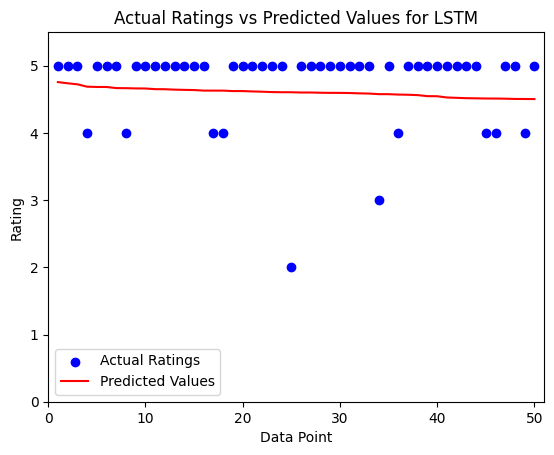

     movieId                                              title  rating  \
122     2033                         Black Cauldron, The (1985)     5.0   
166     2571                                 Matrix, The (1999)     5.0   
176     2654                               Wolf Man, The (1941)     5.0   
34       593                   Silence of the Lambs, The (1991)     4.0   
167     2580                                          Go (1999)     5.0   
68      1196  Star Wars: Episode V - The Empire Strikes Back...     5.0   
147     2329                          American History X (1998)     5.0   
226     3740                 Big Trouble in Little China (1986)     4.0   
219     3578                                   Gladiator (2000)     5.0   
192     2959                                  Fight Club (1999)     5.0   
73      1210  Star Wars: Episode VI - Return of the Jedi (1983)     5.0   
28       527                            Schindler's List (1993)     5.0   
69      1197             

In [ ]:
import matplotlib.pyplot as plt

def recommend_movies_with_ratings_and_plot(user_id, num_recommendations=10):
    # Get all movie IDs that the user has rated
    rated_movies = ratings_data[ratings_data['userId'] == user_id]

    # Create input data for the user and rated movies
    user_input_recommendation = np.full((len(rated_movies), 1), user_id)
    movie_input_recommendation = rated_movies['movieId'].values.reshape(-1, 1)

    # Make predictions for the rated movies
    recommendations = model.predict([user_input_recommendation, movie_input_recommendation])

    # Apply ceiling and floor to predictions
    ceiling = 5.0  # Maximum rating
    floor = 0.5   # Minimum rating
    recommendations = np.clip(recommendations, floor, ceiling)

    # Add the actual ratings and predicted ratings to the rated movies DataFrame
    rated_movies['predicted_rating'] = recommendations

    # Display the top recommended movies with actual and predicted ratings
    top_recommendations = rated_movies.sort_values(by='predicted_rating', ascending=False).head(num_recommendations)[['movieId', 'title', 'rating', 'predicted_rating']]

    # Plot actual ratings and predicted ratings
    actual_ratings = top_recommendations['rating'].values
    predicted_ratings = top_recommendations['predicted_rating'].values

    plt.scatter(range(1, len(actual_ratings) + 1), actual_ratings, color='blue', label='Actual Ratings')
    plt.plot(range(1, len(predicted_ratings) + 1), predicted_ratings, color='red', label='Predicted Values')
    plt.xlabel('Data Point')
    plt.ylabel('Rating')
    plt.title('Actual Ratings vs Predicted Values for LSTM')
    plt.ylim((0, 5.5))
    plt.xlim((0, (num_recommendations + 1)))
    plt.legend()
    plt.show()

    return top_recommendations

# Example: Recommend 10 movies for user ID 1 with actual and predicted ratings, and plot the ratings
user_id_for_recommendation = 1
num_recommendations = 50
recommended_movies = recommend_movies_with_ratings_and_plot(user_id_for_recommendation, num_recommendations)
print(recommended_movies)


# **NN-SVD**

Load dataset and fit model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot
from tensorflow.keras.optimizers import Adam
import time
from math import sqrt

# Create a synthetic dataset
ratings = pd.read_csv('ratings.csv')

ratings_df = pd.DataFrame(ratings)

# Convert user_id and movie_id to categorical codes
ratings_df['userId'] = ratings_df['userId'].astype('category')
ratings_df['movieId'] = ratings_df['movieId'].astype('category')

user_ids = ratings_df['userId'].cat.codes.values
movie_ids = ratings_df['movieId'].cat.codes.values

# Split the dataset
X = np.stack([user_ids, movie_ids], axis=1)
y = ratings_df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model parameters
n_users = ratings_df['userId'].nunique()
n_movies = ratings_df['movieId'].nunique()
n_factors = 50

# Building the model
user_input = Input(shape=(1,), name='user_input')
movie_input = Input(shape=(1,), name='movie_input')
user_embedding = Embedding(output_dim=n_factors, input_dim=n_users, input_length=1, name='user_embedding')(user_input)
movie_embedding = Embedding(output_dim=n_factors, input_dim=n_movies, input_length=1, name='movie_embedding')(movie_input)
user_vector = Flatten(name='flatten_users')(user_embedding)
movie_vector = Flatten(name='flatten_movies')(movie_embedding)
y = Dot(axes=1, name='dot_product')([user_vector, movie_vector])
model = Model(inputs=[user_input, movie_input], outputs=y)
model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

start_time = time.time()
# Train the model
model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=10, validation_data=([X_test[:, 0], X_test[:, 1]], y_test))
training_time = time.time() - start_time

print(f"Training Time: {training_time} seconds")

# Evaluate the model on the test set
evaluation = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test)

# Print the evaluation results
print(f"Mean Squared Error on Test Set: {evaluation}")

# Make predictions on the test set
predictions = model.predict([X_test[:, 0], X_test[:, 1]])

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

print(f"Root Mean Squared Error on Test Set: {rmse}")

# Model summary
model.summary()


Epoch 1/10
2521/2521 [==============================] - 14s 5ms/step - loss: 8.7136 - val_loss: 2.8777
Epoch 2/10
2521/2521 [==============================] - 10s 4ms/step - loss: 1.8007 - val_loss: 1.5966
Epoch 3/10
2521/2521 [==============================] - 9s 4ms/step - loss: 1.0587 - val_loss: 1.3570
Epoch 4/10
2521/2521 [==============================] - 9s 4ms/step - loss: 0.8070 - val_loss: 1.2901
Epoch 5/10
2521/2521 [==============================] - 9s 4ms/step - loss: 0.6641 - val_loss: 1.2707
Epoch 6/10
2521/2521 [==============================] - 9s 4ms/step - loss: 0.5644 - val_loss: 1.2585
Epoch 7/10
2521/2521 [==============================] - 9s 4ms/step - loss: 0.4854 - val_loss: 1.2668
Epoch 8/10
2521/2521 [==============================] - 9s 4ms/step - loss: 0.4177 - val_loss: 1.2653
Epoch 9/10
2521/2521 [==============================] - 10s 4ms/step - loss: 0.3545 - val_loss: 1.2771
Epoch 10/10
2521/2521 [==============================] - 10s 4ms/step - loss: 0

Evaluate Model

In [ ]:
from sklearn.metrics import ndcg_score

# Evaluate the model on the test set
evaluation = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test)

# Print the evaluation results
print(f"Mean Squared Error on Test Set: {evaluation}")

# Set a ceiling and a floor for predictions
ceiling = 5.0  # Maximum rating
floor = 0.5   # Minimum rating

# Evaluate the model on the testing set using RMSE
predictions = model.predict([X_test[:, 0], X_test[:, 1]])

# Apply ceiling and floor to predictions
predictions = np.clip(predictions, floor, ceiling)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error on Test Data: {rmse}')

# Reshape predictions to a 1D array
predictions = predictions.flatten()

# Calculate NDCG
ndcg = ndcg_score(np.array([X_test[:, 0]]), np.array([predictions]))
print(f'NDCG on Test Data: {ndcg}')

# Get indices of top 100 predictions
top_100_indices = np.argsort(predictions.flatten())[::-1][:100]

# Select top 100 recommendations based on indices
top_100_predictions = predictions.flatten()[top_100_indices]
top_100_actual_ratings = y_test[top_100_indices]

# Calculate NDCG at 100
ndcg_100 = ndcg_score(np.array([top_100_actual_ratings]), np.array([top_100_predictions]))
print(f'NDCG at 100 on Test Data: {ndcg_100}')


631/631 [==============================] - 1s 2ms/step - loss: 1.2949
Mean Squared Error on Test Set: 1.2948758602142334
631/631 [==============================] - 1s 2ms/step
Root Mean Squared Error on Test Data: 1.080392089402619
NDCG on Test Data: 0.9372372424062201
NDCG at 100 on Test Data: 0.9705052512373217


Recommend unrated movies for a user

In [ ]:
# Define recommend_movies function
def recommend_movies(user_id, num_recommendations=10):
    # Assuming you have a 'movies.csv' file with movie information
    movies_data = pd.read_csv('movies.csv')

    # Get all movie IDs that the user has not rated
    unrated_movies = movies_data[~movies_data['movieId'].isin(ratings_df[ratings_df['userId'] == user_id]['movieId'])]

    # Create input data for the user and unrated movies
    user_input_recommendation = np.full((len(unrated_movies), 1), user_id)
    movie_input_recommendation = unrated_movies['movieId'].values.reshape(-1, 1)

    # Make predictions for the unrated movies
    recommendations = model.predict([user_input_recommendation, movie_input_recommendation])

    # Apply ceiling and floor to predictions
    ceiling = 5.0  # Maximum rating
    floor = 0.5   # Minimum rating
    recommendations = np.clip(recommendations, floor, ceiling)

    # Add the predicted ratings to the unrated movies DataFrame
    unrated_movies['predicted_rating'] = recommendations

    # Sort movies based on predicted ratings in descending order
    recommended_movies = unrated_movies.sort_values(by='predicted_rating', ascending=False)

    # Display the top recommended movies
    top_recommendations = recommended_movies.head(num_recommendations)[['movieId', 'title', 'predicted_rating']]
    return top_recommendations

# Example: Recommend 10 movies for user ID 1
user_id_for_recommendation = 1
num_recommendations = 50
recommended_movies = recommend_movies(user_id_for_recommendation, num_recommendations)
print(recommended_movies)

298/298 [==============================] - 0s 1ms/step
      movieId                                              title  \
3233     4369                   Fast and the Furious, The (2001)   
2454     3267                                Mariachi, El (1992)   
4008     5665                            Knockaround Guys (2002)   
1817     2417                                   Heartburn (1986)   
1091     1416                                       Evita (1996)   
3912     5499                            Robin and Marian (1976)   
4282     6251                          Piglet's Big Movie (2003)   
1945     2579                                   Following (1998)   
999      1301                            Forbidden Planet (1956)   
5302     8784                                Garden State (2004)   
5361     8943                                 Being Julia (2004)   
44         48                                  Pocahontas (1995)   
3371     4583                          Disorganized Crime (19

<ipython-input-51-baf0a53721b2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unrated_movies['predicted_rating'] = recommendations


Recommend rated movies and plot them with the actual and predicted ratings

8/8 [==============================] - 0s 2ms/step


<ipython-input-52-faf6a5b40100>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_movies['predicted_rating'] = recommendations


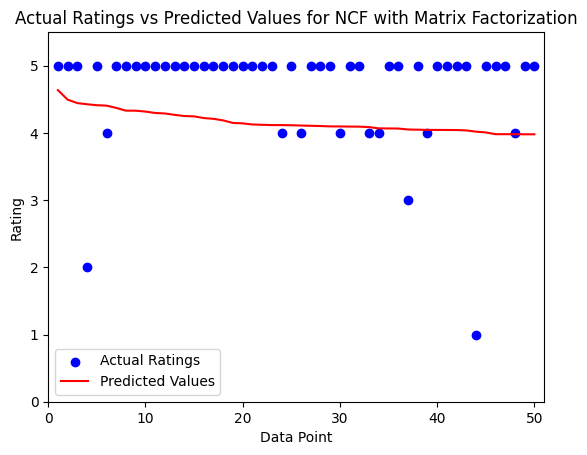

    movieId  rating  predicted_rating
203    3147     5.0          4.637481
105    1625     5.0          4.495400
224    3703     5.0          4.443853
76     1219     2.0          4.426460
86     1275     5.0          4.412229
20      356     4.0          4.406217
192    2959     5.0          4.372513
62     1089     5.0          4.331163
166    2571     5.0          4.330889
103    1617     5.0          4.318017
167    2580     5.0          4.296835
90     1298     5.0          4.289429
168    2596     5.0          4.268998
67     1136     5.0          4.251598
231    5060     5.0          4.246387
126    2058     5.0          4.221081
77     1220     5.0          4.209590
85     1270     5.0          4.186237
21      362     5.0          4.148531
147    2329     5.0          4.142315
219    3578     5.0          4.125868
87     1278     5.0          4.120986
10      163     5.0          4.116632
154    2406     4.0          4.116452
195    2991     5.0          4.114276
121    2028 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot
from tensorflow.keras.optimizers import Adam
import time
from math import sqrt
import matplotlib.pyplot as plt

# Function to recommend movies with ratings and plot
def recommend_movies_with_ratings_and_plot(user_id, num_recommendations=10):
    # Get all movie IDs that the user has rated
    rated_movies = ratings_df[ratings_df['userId'] == user_id]

    # Create input data for the user and rated movies
    user_input_recommendation = np.full((len(rated_movies), 1), user_id)
    movie_input_recommendation = rated_movies['movieId'].cat.codes.values.reshape(-1, 1)

    # Make predictions for the rated movies
    recommendations = model.predict([user_input_recommendation, movie_input_recommendation])

    # Apply ceiling and floor to predictions
    ceiling = 5.0  # Maximum rating
    floor = 0.5   # Minimum rating
    recommendations = np.clip(recommendations, floor, ceiling)

    # Add the actual ratings and predicted ratings to the rated movies DataFrame
    rated_movies['predicted_rating'] = recommendations

    # Display the top recommended movies with actual and predicted ratings
    top_recommendations = rated_movies.sort_values(by='predicted_rating', ascending=False).head(num_recommendations)[['movieId', 'rating', 'predicted_rating']]

    # Plot actual ratings and predicted ratings
    actual_ratings = top_recommendations['rating'].values
    predicted_ratings = top_recommendations['predicted_rating'].values

    plt.scatter(range(1, len(actual_ratings) + 1), actual_ratings, color='blue', label='Actual Ratings')
    plt.plot(range(1, len(predicted_ratings) + 1), predicted_ratings, color='red', label='Predicted Values')
    plt.xlabel('Data Point')
    plt.ylabel('Rating')
    plt.title('Actual Ratings vs Predicted Values for NCF with Matrix Factorization')
    plt.ylim((0, 5.5))
    plt.xlim((0, (num_recommendations + 1)))
    plt.legend()
    plt.show()

    return top_recommendations

# Example: Recommend 10 movies for user ID 1 with actual and predicted ratings, and plot the ratings
user_id_for_recommendation = 1
num_recommendations = 50
recommended_movies = recommend_movies_with_ratings_and_plot(user_id_for_recommendation, num_recommendations)
print(recommended_movies)
